# Pandas : Examples

## Reading CSV

In [1]:
import pandas as pd
students = pd.read_csv('students.csv')
students

Name        City
0   Donald Duck  Copenhagen
1         Goofy      Aarhus
2  Mickey Mouse      Aarhus

## Loading Pandas data frames from sqlite3

In [2]:
import pandas as pd
import sqlite3

connection = sqlite3.connect('example.sqlite')

countries = pd.read_sql_query('SELECT * FROM country', connection)
cities = pd.read_sql_query('SELECT * FROM city', connection)

students.to_sql('students', connection, if_exists='replace')

In [3]:
type(countries), type(cities), type(students)  # Pandas data frame

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame)

In [4]:
countries  # looks nice, because of Jupyter notebook integration

name  population     area           capital
0  Denmark     5748769    42931        Copenhagen
1  Germany    82800000   357168            Berlin
2      USA   325719178  9833520  Washington, D.C.
3  Iceland      334252   102775         Reykjavik

In [5]:
print(countries)  # does not exploit Jupyter notebook integration

      name  population     area           capital
0  Denmark     5748769    42931        Copenhagen
1  Germany    82800000   357168            Berlin
2      USA   325719178  9833520  Washington, D.C.
3  Iceland      334252   102775         Reykjavik


In [6]:
cities

name  country  population  established
0        Copenhagen  Denmark      775033          800
1            Aarhus  Denmark      273077          750
2            Berlin  Germany     3711930         1237
3            Munich  Germany     1464301         1158
4         Reykjavik  Iceland      126100          874
5  Washington, D.C.      USA      693972         1790
6       New Orleans      USA      343829         1718
7     San Francisco      USA      884363         1776

## Indexing data frames

In [7]:
countries['name']  # single column

0    Denmark
1    Germany
2        USA
3    Iceland
Name: name, dtype: object

In [8]:
countries.name  # can also access columns by .name

0    Denmark
1    Germany
2        USA
3    Iceland
Name: name, dtype: object

In [9]:
countries[['name', 'capital']]  # select multiple columns

name           capital
0  Denmark        Copenhagen
1  Germany            Berlin
2      USA  Washington, D.C.
3  Iceland         Reykjavik

In [10]:
countries.head(2)  # first two rows

name  population    area     capital
0  Denmark     5748769   42931  Copenhagen
1  Germany    82800000  357168      Berlin

In [11]:
countries.tail(1)  # not a row but a data frame with one row
                   # notice row label is unchanged

name  population    area    capital
3  Iceland      334252  102775  Reykjavik

In [12]:
countries[1:3]  # row slicing by row lables

name  population     area           capital
1  Germany    82800000   357168            Berlin
2      USA   325719178  9833520  Washington, D.C.

In [13]:
countries[::2]  # every 2nd row

name  population     area           capital
0  Denmark     5748769    42931        Copenhagen
2      USA   325719178  9833520  Washington, D.C.

In [14]:
countries.at[2, 'capital']  # use .at to lookup single cell

'Washington, D.C.'

In [15]:
cities.loc[1]  # single row is accessed using .loc[row lable]

name            Aarhus
country        Denmark
population      273077
established        750
Name: 1, dtype: object

In [16]:
cities.loc[1]['name']  # another way to get a single value

'Aarhus'

In [17]:
cities.loc[1, 'name']  # and yet another way

'Aarhus'

In [18]:
cities.loc[[1,  3], ['country', 'name']]  # extract sub data frame

country    name
1  Denmark  Aarhus
3  Germany  Munich

## Masking rows

In [19]:
mask = cities['country'] == 'Denmark'
mask

0     True
1     True
2    False
3    False
4    False
5    False
6    False
7    False
Name: country, dtype: bool

In [20]:
cities[mask]  # use a boolean data frame as a mask

name  country  population  established
0  Copenhagen  Denmark      775033          800
1      Aarhus  Denmark      273077          750

In [21]:
cities[cities.country == 'Denmark']  # or shorter

name  country  population  established
0  Copenhagen  Denmark      775033          800
1      Aarhus  Denmark      273077          750

In [22]:
# can also do operations on columns +, -, &, |, ...
cities[(cities.country == 'Denmark') & (cities.established < 800)]

name  country  population  established
1  Aarhus  Denmark      273077          750

In [23]:
cities.population + cities.established  # not very meaningfull but you can do it..

0     775833
1     273827
2    3713167
3    1465459
4     126974
5     695762
6     345547
7     886139
dtype: int64

## Creating data frames from data

In [24]:
pd.DataFrame([10, 11, 12, 13])  # one dimensional data

0
0  10
1  11
2  12
3  13

In [25]:
pd.DataFrame({'A': [1,2,3], 'B': ['one', 'two', 'three']})  # data frame from dictionary

A      B
0  1    one
1  2    two
2  3  three

In [26]:
pd.DataFrame([[10, 11], [12, 13]])  # two dimensional list

0   1
0  10  11
1  12  13

In [27]:
pd.DataFrame([[10, 11], [12, 13]], columns=['A', 'B'])  # name columns

A   B
0  10  11
1  12  13

In [28]:
pd.DataFrame([[10, 11], [12, 13]], 
             columns=['A', 'B'],
             index=['x', 'y'])    # can also assign row labels

A   B
x  10  11
y  12  13

In [29]:
import numpy as np
A = np.random.random((3, 4))
A

array([[0.57252247, 0.60743944, 0.05473956, 0.79662469],
       [0.04944432, 0.15741632, 0.13890316, 0.81421765],
       [0.98212556, 0.77183968, 0.06285572, 0.31457113]])

In [30]:
pd.DataFrame(A)

0         1         2         3
0  0.572522  0.607439  0.054740  0.796625
1  0.049444  0.157416  0.138903  0.814218
2  0.982126  0.771840  0.062856  0.314571

In [31]:
R = pd.DataFrame(A, columns=list('ABCD'), index=list('yxz'))
R

A         B         C         D
y  0.572522  0.607439  0.054740  0.796625
x  0.049444  0.157416  0.138903  0.814218
z  0.982126  0.771840  0.062856  0.314571

# Labelled rows .loc and .iloc

In [32]:
R.loc['x':'z', ['B', 'C']]  # row slicing is now by labels (inclusive)

B         C
x  0.157416  0.138903
z  0.771840  0.062856

In [33]:
R.iloc[1, 2]  # .iloc can be used to index with integer numbers

0.13890315739933812

In [34]:
R.iloc[:2, :2]  # two first first rows and columns
# R[:2, :2] is invalid !!!

A         B
y  0.572522  0.607439
x  0.049444  0.157416

## Mering two data frames

In [35]:
# data frames can be merged
# note that 'name' and 'population' are in both original data frames
M = pd.merge(countries, cities, left_on='capital', right_on='name')
M  

name_x  population_x     area           capital            name_y  \
0  Denmark       5748769    42931        Copenhagen        Copenhagen   
1  Germany      82800000   357168            Berlin            Berlin   
2      USA     325719178  9833520  Washington, D.C.  Washington, D.C.   
3  Iceland        334252   102775         Reykjavik         Reykjavik   

   country  population_y  established  
0  Denmark        775033          800  
1  Germany       3711930         1237  
2      USA        693972         1790  
3  Iceland        126100          874

## Renaming, dropping and adding columns

In [36]:
M1 = M.rename(columns={
    'population_x': 'country_population',
    'population_y': 'capital_population'
})
M2 = M1.drop(columns=['name_x', 'name_y'])
M2

country_population     area           capital  country  capital_population  \
0             5748769    42931        Copenhagen  Denmark              775033   
1            82800000   357168            Berlin  Germany             3711930   
2           325719178  9833520  Washington, D.C.      USA              693972   
3              334252   102775         Reykjavik  Iceland              126100   

   established  
0          800  
1         1237  
2         1790  
3          874

In [37]:
M2['empty column'] = None  # add new column to existing data frame
M2

country_population     area           capital  country  capital_population  \
0             5748769    42931        Copenhagen  Denmark              775033   
1            82800000   357168            Berlin  Germany             3711930   
2           325719178  9833520  Washington, D.C.      USA              693972   
3              334252   102775         Reykjavik  Iceland              126100   

   established empty column  
0          800         None  
1         1237         None  
2         1790         None  
3          874         None

In [38]:
# add new column based on column computation
M2['%pop in capital'] = M2.capital_population / M2.country_population
M2

country_population     area           capital  country  capital_population  \
0             5748769    42931        Copenhagen  Denmark              775033   
1            82800000   357168            Berlin  Germany             3711930   
2           325719178  9833520  Washington, D.C.      USA              693972   
3              334252   102775         Reykjavik  Iceland              126100   

   established empty column  %pop in capital  
0          800         None         0.134817  
1         1237         None         0.044830  
2         1790         None         0.002131  
3          874         None         0.377260

## Sorting rows

In [39]:
# 'inplace' changes existing data frame without creating new data frame,
# otherwise a new data frame is created and returned
M2.sort_values('%pop in capital', ascending=False, inplace=True)
M2

country_population     area           capital  country  capital_population  \
3              334252   102775         Reykjavik  Iceland              126100   
0             5748769    42931        Copenhagen  Denmark              775033   
1            82800000   357168            Berlin  Germany             3711930   
2           325719178  9833520  Washington, D.C.      USA              693972   

   established empty column  %pop in capital  
3          874         None         0.377260  
0          800         None         0.134817  
1         1237         None         0.044830  
2         1790         None         0.002131

## Pandas and Matplotlib integration

<IPython.core.display.Javascript object>


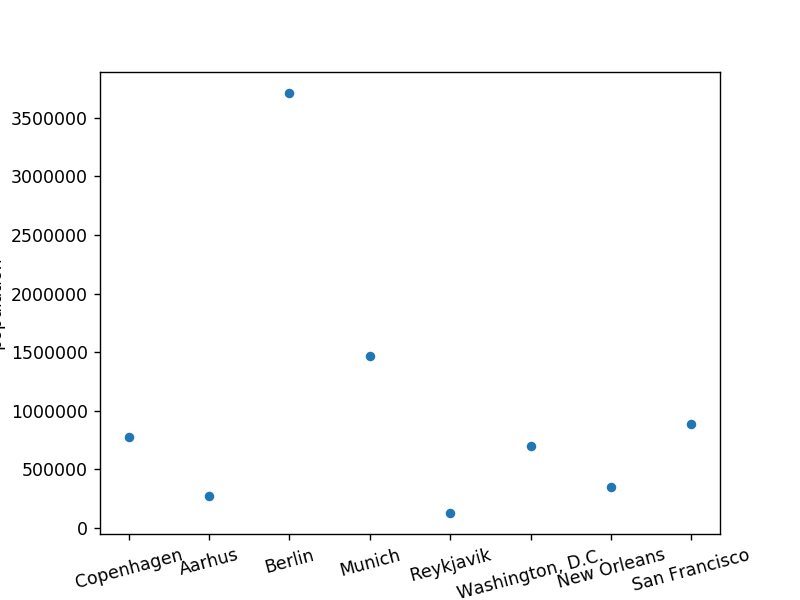

In [40]:
%matplotlib notebook

cities.plot(kind='scatter', x='name', y='population', rot=15)  # data frames have a .plot attribute

## pandas_datareader and matplotlib integration

c:\users\au121\appdata\local\programs\python\python38-32\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


<IPython.core.display.Javascript object>


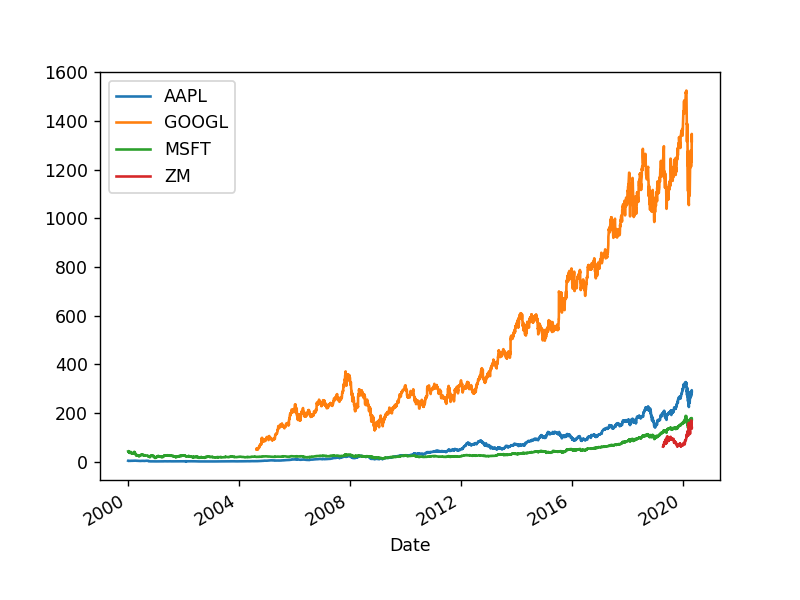

In [41]:
import matplotlib.pyplot as plt
import pandas_datareader  # module giving access to a lot of standard data sources, eg. World Bank

#df = pandas_datareader.data.DataReader(['AAPL', 'GOOGL', 'MSFT', 'ZM'], 'stooq')  # ignores start=...

stocks = pandas_datareader.stooq.StooqDailyReader(['AAPL', 'GOOGL', 'MSFT', 'ZM'], start='2000-01-01').read()
stocks['Close'].plot()
plt.legend()
None  # avoid print result of plt.legend() to terminal

## Hierarchical / Multi-level indexing (MultiIndex)

In [42]:
countries.columns  # a standard index

Index(['name', 'population', 'area', 'capital'], dtype='object')

In [43]:
countries.index  # standard row labels

RangeIndex(start=0, stop=4, step=1)

In [44]:
stocks  # notice hierarchical headings

Attributes     Close                                High                    \
Symbols         AAPL    GOOGL     MSFT      ZM      AAPL    GOOGL     MSFT   
Date                                                                         
2000-01-03    3.4698      NaN   42.148     NaN    3.4869      NaN   42.895   
2000-01-04    3.1771      NaN   40.730     NaN    3.4300      NaN   42.350   
2000-01-05    3.2242      NaN   41.157     NaN    3.4276      NaN   42.085   
2000-01-06    2.9452      NaN   39.779     NaN    3.3171      NaN   41.181   
2000-01-07    3.0853      NaN   40.296     NaN    3.1311      NaN   40.592   
...              ...      ...      ...     ...       ...      ...      ...   
2020-04-27  283.1700  1270.86  174.050  164.60  284.5400  1294.10  176.900   
2020-04-28  278.5800  1232.59  169.810  156.72  285.8300  1284.76  175.670   
2020-04-29  287.7300  1342.18  177.430  146.48  289.6700  1360.15  177.680   
2020-04-30  293.8000  1346.70  179.210  135.17  294.5300  1350.00  180.400   
2020-05-01  289.0700  1317.32  174.570  138.56  299.0000  1351.43  178.640   

Attributes               Low                                  Open           \
Symbols         ZM      AAPL    GOOGL     MSFT        ZM      AAPL    GOOGL   
Date                                                                          
2000-01-03     NaN    3.1522      NaN   40.495       NaN    3.2516      NaN   
2000-01-04     NaN    3.1374      NaN   40.592       NaN    3.3554      NaN   
2000-01-05     NaN    3.1932      NaN   39.549       NaN    3.2168      NaN   
2000-01-06     NaN    2.9452      NaN   39.190       NaN    3.2898      NaN   
2000-01-07     NaN    2.9614      NaN   38.802       NaN    2.9913      NaN   
...            ...       ...      ...      ...       ...       ...      ...   
2020-04-27  167.85  279.9500  1265.06  173.300  155.0000  281.8000  1292.00   
2020-04-28  166.00  278.2000  1230.38  169.390  155.2500  285.0800  1283.20   
2020-04-29  151.00  283.8900  1326.73  171.880  143.3800  284.7300  1345.00   
2020-04-30  143.80  288.3500  1321.50  176.230  133.6801  289.9600  1331.36   
2020-05-01  141.63  285.8500  1309.66  174.010  132.6700  286.2500  1324.09   

Attributes                        Volume                                     
Symbols        MSFT      ZM         AAPL      GOOGL        MSFT          ZM  
Date                                                                         
2000-01-03   42.446     NaN  154312168.0        NaN  73600921.0         NaN  
2000-01-04   41.066     NaN  147567311.0        NaN  74832390.0         NaN  
2000-01-05   40.180     NaN  224160517.0        NaN  88577634.0         NaN  
2000-01-06   40.568     NaN  221180021.0        NaN  76018229.0         NaN  
2000-01-07   39.278     NaN  132693820.0        NaN  85748546.0         NaN  
...             ...     ...          ...        ...         ...         ...  
2020-04-27  176.590  156.59   29271893.0  2209333.0  33194384.0  19783693.0  
2020-04-28  175.590  165.00   28001187.0  4035007.0  34392694.0  13477842.0  
2020-04-29  173.220  147.98   34320204.0  5417888.0  51286559.0  22033320.0  
2020-04-30  180.000  139.99   45765968.0  2792124.0  53875857.0  16682256.0  
2020-05-01  175.800  136.00   60154175.0  2443554.0  39370474.0  13806992.0  

[5115 rows x 20 columns]

In [45]:
stocks.Close  # one top level group of the columns

Symbols         AAPL    GOOGL     MSFT      ZM
Date                                          
2000-01-03    3.4698      NaN   42.148     NaN
2000-01-04    3.1771      NaN   40.730     NaN
2000-01-05    3.2242      NaN   41.157     NaN
2000-01-06    2.9452      NaN   39.779     NaN
2000-01-07    3.0853      NaN   40.296     NaN
...              ...      ...      ...     ...
2020-04-27  283.1700  1270.86  174.050  164.60
2020-04-28  278.5800  1232.59  169.810  156.72
2020-04-29  287.7300  1342.18  177.430  146.48
2020-04-30  293.8000  1346.70  179.210  135.17
2020-05-01  289.0700  1317.32  174.570  138.56

[5115 rows x 4 columns]

In [46]:
stocks.Close.GOOGL  # selecting a single column

Date
2000-01-03        NaN
2000-01-04        NaN
2000-01-05        NaN
2000-01-06        NaN
2000-01-07        NaN
               ...   
2020-04-27    1270.86
2020-04-28    1232.59
2020-04-29    1342.18
2020-04-30    1346.70
2020-05-01    1317.32
Name: GOOGL, Length: 5115, dtype: float64

In [47]:
stocks['Close']['GOOGL']  # same as above

Date
2000-01-03        NaN
2000-01-04        NaN
2000-01-05        NaN
2000-01-06        NaN
2000-01-07        NaN
               ...   
2020-04-27    1270.86
2020-04-28    1232.59
2020-04-29    1342.18
2020-04-30    1346.70
2020-05-01    1317.32
Name: GOOGL, Length: 5115, dtype: float64

In [48]:
stocks.columns  # has a MultiIndex

MultiIndex([( 'Close',  'AAPL'),
            ( 'Close', 'GOOGL'),
            ( 'Close',  'MSFT'),
            ( 'Close',    'ZM'),
            (  'High',  'AAPL'),
            (  'High', 'GOOGL'),
            (  'High',  'MSFT'),
            (  'High',    'ZM'),
            (   'Low',  'AAPL'),
            (   'Low', 'GOOGL'),
            (   'Low',  'MSFT'),
            (   'Low',    'ZM'),
            (  'Open',  'AAPL'),
            (  'Open', 'GOOGL'),
            (  'Open',  'MSFT'),
            (  'Open',    'ZM'),
            ('Volume',  'AAPL'),
            ('Volume', 'GOOGL'),
            ('Volume',  'MSFT'),
            ('Volume',    'ZM')],
           names=['Attributes', 'Symbols'])

In [49]:
stocks.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23',
               '2020-04-24', '2020-04-27', '2020-04-28', '2020-04-29',
               '2020-04-30', '2020-05-01'],
              dtype='datetime64[ns]', name='Date', length=5115, freq=None)

In [50]:
# select all rows and columns with 1st level = all, 2nd level = 'GOOGLE'
stocks.loc[:, pd.IndexSlice[:,'GOOGL']]  

Attributes    Close     High      Low     Open     Volume
Symbols       GOOGL    GOOGL    GOOGL    GOOGL      GOOGL
Date                                                     
2000-01-03      NaN      NaN      NaN      NaN        NaN
2000-01-04      NaN      NaN      NaN      NaN        NaN
2000-01-05      NaN      NaN      NaN      NaN        NaN
2000-01-06      NaN      NaN      NaN      NaN        NaN
2000-01-07      NaN      NaN      NaN      NaN        NaN
...             ...      ...      ...      ...        ...
2020-04-27  1270.86  1294.10  1265.06  1292.00  2209333.0
2020-04-28  1232.59  1284.76  1230.38  1283.20  4035007.0
2020-04-29  1342.18  1360.15  1326.73  1345.00  5417888.0
2020-04-30  1346.70  1350.00  1321.50  1331.36  2792124.0
2020-05-01  1317.32  1351.43  1309.66  1324.09  2443554.0

[5115 rows x 5 columns]

## Creating your own multi index

In [51]:
column_index = pd.MultiIndex.from_tuples([('one', 'a'), ('one', 'b'),
                                          ('two', 'a'), ('two', 'b'), ('two', 'c')])

row_index = pd.MultiIndex.from_tuples((x, y) for x in 'ABC' for y in 'xy')

H = pd.DataFrame(np.arange(30).reshape(6, 5), columns=column_index, index=row_index)
H

one     two        
      a   b   a   b   c
A x   0   1   2   3   4
  y   5   6   7   8   9
B x  10  11  12  13  14
  y  15  16  17  18  19
C x  20  21  22  23  24
  y  25  26  27  28  29

## Reorganizing hierarcical labels - stack and unstack

In [52]:
H

one     two        
      a   b   a   b   c
A x   0   1   2   3   4
  y   5   6   7   8   9
B x  10  11  12  13  14
  y  15  16  17  18  19
C x  20  21  22  23  24
  y  25  26  27  28  29

In [53]:
H.stack(level=0)  # move one level of indexing from columns to last rows (missing columns filled with NaN)

a   b     c
A x one   0   1   NaN
    two   2   3   4.0
  y one   5   6   NaN
    two   7   8   9.0
B x one  10  11   NaN
    two  12  13  14.0
  y one  15  16   NaN
    two  17  18  19.0
C x one  20  21   NaN
    two  22  23  24.0
  y one  25  26   NaN
    two  27  28  29.0

In [54]:
H.stack(level=1)

one  two
A x a   0.0    2
    b   1.0    3
    c   NaN    4
  y a   5.0    7
    b   6.0    8
    c   NaN    9
B x a  10.0   12
    b  11.0   13
    c   NaN   14
  y a  15.0   17
    b  16.0   18
    c   NaN   19
C x a  20.0   22
    b  21.0   23
    c   NaN   24
  y a  25.0   27
    b  26.0   28
    c   NaN   29

In [55]:
H.unstack(level=0)  # and unstack moves row level to column last level

one                    two                              
    a          b           a          b          c        
    A   B   C  A   B   C   A   B   C  A   B   C  A   B   C
x   0  10  20  1  11  21   2  12  22  3  13  23  4  14  24
y   5  15  25  6  16  26   7  17  27  8  18  28  9  19  29

## And there are much more ... see the Pandas documentation